# Decision Tree Regression Model Building

Data Collection:
    https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/household_power_consumption.txt", sep=";")

### Checking shape of the dataset

In [5]:
df.shape

(2075259, 9)

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Taking sample data of 50K

In [7]:
data = df.sample(n=50000, ignore_index=True)

In [8]:
data[data['Date'] == '16/12/2006']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
946,16/12/2006,20:25:00,3.230,0.052,232.790,13.800,0.000,0.000,16.0
6954,16/12/2006,22:45:00,2.334,0.060,239.570,9.600,0.000,0.000,0.0
9152,16/12/2006,22:50:00,2.414,0.000,240.020,10.000,0.000,0.000,0.0
11845,16/12/2006,21:25:00,3.392,0.052,236.240,14.200,0.000,0.000,17.0
14518,16/12/2006,20:23:00,3.290,0.000,232.420,14.000,0.000,0.000,16.0
15448,16/12/2006,20:39:00,3.204,0.078,232.500,13.600,0.000,0.000,16.0
22472,16/12/2006,19:55:00,3.202,0.078,232.200,13.800,0.000,0.000,16.0
26184,16/12/2006,20:17:00,3.310,0.000,232.830,14.200,0.000,0.000,17.0
28309,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
31257,16/12/2006,19:36:00,3.276,0.000,231.970,14.000,0.000,1.000,17.0


### Data Cleaning

In [9]:
data.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           620
dtype: int64

In [10]:
# creating bool series True for NaN values
bool_series = pd.isnull(data["Sub_metering_3"])
   
# filtering data
# displaying data only with Sub_metering_3 = NaN
data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
3,10/12/2008,11:29:00,?,?,?,?,?,?,NaN
126,26/9/2010,12:58:00,?,?,?,?,?,?,NaN
341,19/8/2010,20:13:00,?,?,?,?,?,?,NaN
344,15/6/2009,04:12:00,?,?,?,?,?,?,NaN
390,12/1/2010,21:22:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
49261,20/8/2010,04:14:00,?,?,?,?,?,?,NaN
49474,25/9/2010,07:00:00,?,?,?,?,?,?,NaN
49552,20/3/2010,12:15:00,?,?,?,?,?,?,NaN
49682,27/9/2010,22:58:00,?,?,?,?,?,?,NaN


**Observation:**
Except Date and Time columns, all columns are having no data

### Replacing '?' with np.nan

In [11]:
data.replace('?',np.nan,inplace=True)

In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.reset_index(inplace = True, drop = True)

In [14]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,5/10/2009,09:08:00,1.430,0.192,237.640,6.000,0.000,1.000,18.0
1,31/1/2010,15:42:00,1.450,0.080,244.020,5.800,0.000,0.000,19.0
2,29/1/2010,12:52:00,1.552,0.046,243.430,6.400,0.000,0.000,19.0
3,15/6/2007,08:15:00,2.298,0.348,238.550,10.000,0.000,30.000,0.0
4,7/4/2007,20:51:00,0.294,0.000,238.950,1.200,0.000,0.000,0.0


In [15]:
data.shape

(49380, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49380 entries, 0 to 49379
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49380 non-null  object 
 1   Time                   49380 non-null  object 
 2   Global_active_power    49380 non-null  object 
 3   Global_reactive_power  49380 non-null  object 
 4   Voltage                49380 non-null  object 
 5   Global_intensity       49380 non-null  object 
 6   Sub_metering_1         49380 non-null  object 
 7   Sub_metering_2         49380 non-null  object 
 8   Sub_metering_3         49380 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [17]:
data['Date'].unique()

array(['5/10/2009', '31/1/2010', '29/1/2010', ..., '6/3/2007',
       '22/8/2010', '25/9/2010'], dtype=object)

### spliting the Date column into 3 columns - Day, Month, Year

In [18]:
data['Date1']=data.Date.apply(lambda x:x.split('/')[0]).astype(int)
data['Month']=data.Date.apply(lambda x:x.split('/')[1]).astype(int)
data['Year']=data.Date.apply(lambda x:x.split('/')[2]).astype(int)

In [19]:
data['Time'].value_counts()

20:44:00    58
03:20:00    52
11:50:00    51
13:24:00    51
05:56:00    51
            ..
19:26:00    21
15:12:00    21
02:07:00    20
10:25:00    18
07:08:00    18
Name: Time, Length: 1440, dtype: int64

### spliting the Time column into 2 columns - Hours and Minutes

In [20]:
data['hour']=data.Time.apply(lambda x:x.split(' ')[0].split(':')[0]).astype('int')
data['min']=data.Time.apply(lambda x:x.split(' ')[0].split(':')[1]).astype('int')

### Removing Date and Time columns 

In [21]:
data.drop(['Date','Time'],axis=1,inplace=True)

### Changing the datatype of few columns from Object to Float

In [22]:
data['Global_active_power'] = data['Global_active_power'].astype(float)
data['Global_reactive_power'] = data['Global_reactive_power'].astype(float)
data['Voltage'] = data['Voltage'].astype(float)
data['Global_intensity'] = data['Global_intensity'].astype(float)
data['Sub_metering_1'] = data['Sub_metering_1'].astype(float)
data['Sub_metering_2'] = data['Sub_metering_2'].astype(float)
data['Sub_metering_3'] = data['Sub_metering_3'].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49380 entries, 0 to 49379
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49380 non-null  float64
 1   Global_reactive_power  49380 non-null  float64
 2   Voltage                49380 non-null  float64
 3   Global_intensity       49380 non-null  float64
 4   Sub_metering_1         49380 non-null  float64
 5   Sub_metering_2         49380 non-null  float64
 6   Sub_metering_3         49380 non-null  float64
 7   Date1                  49380 non-null  int64  
 8   Month                  49380 non-null  int64  
 9   Year                   49380 non-null  int64  
 10  hour                   49380 non-null  int64  
 11  min                    49380 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 4.5 MB


### Merging Sub_metering_1, Sub_metering_1, Sub_metering_1 into Total_Consumption

In [24]:
data['Total_Consumption'] = data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']

In [25]:
data.drop(axis=1, columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)

In [26]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Date1,Month,Year,hour,min,Total_Consumption
0,1.430,0.192,237.64,6.0,5,10,2009,9,8,19.0
1,1.450,0.080,244.02,5.8,31,1,2010,15,42,19.0
2,1.552,0.046,243.43,6.4,29,1,2010,12,52,19.0
3,2.298,0.348,238.55,10.0,15,6,2007,8,15,30.0
4,0.294,0.000,238.95,1.2,7,4,2007,20,51,0.0


### Checking duplicates

In [27]:
data.duplicated().sum()

0

#### Dependent and Independent Variables

In [28]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [29]:
X.shape, y.shape

((49380, 9), (49380,))

### Train Test split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37035, 9), (12345, 9), (37035,), (12345,))

### Decision Tree without Hyper parameter tunning

In [32]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
dt.score(X_train, y_train)

1.0

In [34]:
y_pred = dt.predict(X_test)

In [35]:
dt.score(X_test, y_test)

0.7499568941335988

### Model is Overfitting . We need to prun the Tree

### Decision Tree with Hyper parameter tunning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
             'splitter' : ['best', 'random'],
             'max_depth' : [7,8,9,10],
             'min_samples_split' : [10],
             'max_features': ['auto', 'sqrt', 'log2']}

In [38]:
regressorcv = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parameters, cv=5,n_jobs=-1)

In [39]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [10],
                         'splitter': ['best', 'random']})

In [40]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 10,
 'splitter': 'best'}

In [41]:
regressor_best_param = DecisionTreeRegressor(criterion='squared_error',max_depth= 10,max_features='auto',splitter='best',min_samples_split=10)

In [42]:
regressor_best_param.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_split=10)

In [43]:
regressor_best_param.score(X_train, y_train)

0.8855411412337055

In [44]:
y_pred = regressor_best_param.predict(X_test)

### R2 score

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,y_pred)

0.8225474140095721

## Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=8,bootstrap=True, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [49]:
rfr.score(X_train, y_train)

0.8717850642033242

In [50]:
rfr.score(X_test, y_test)

0.8456728991282211

## Bagging Regressor

In [51]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [52]:
br = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=SVR(), random_state=0)

In [53]:
br.score(X_train, y_train)

-0.3002619892530942

In [54]:
y_pred = br.predict(X_test)

In [55]:
br.score(X_test, y_test)

-0.29861447956590137

## ExtraTree Regressor

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

In [58]:
etr.score(X_train, y_train)

1.0

In [59]:
y_pred = etr.predict(X_test)

In [60]:
etr.score(X_test, y_test)

0.8782814709099761

## Voting Regressor

In [61]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [62]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
vtr = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
vtr.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [63]:
vtr.score(X_train, y_train)

0.8975726868529844

In [64]:
y_pred = vtr.predict(X_test)

In [65]:
vtr.score(X_test, y_test)

0.8280270379088774

In [66]:
### Tree Visualization

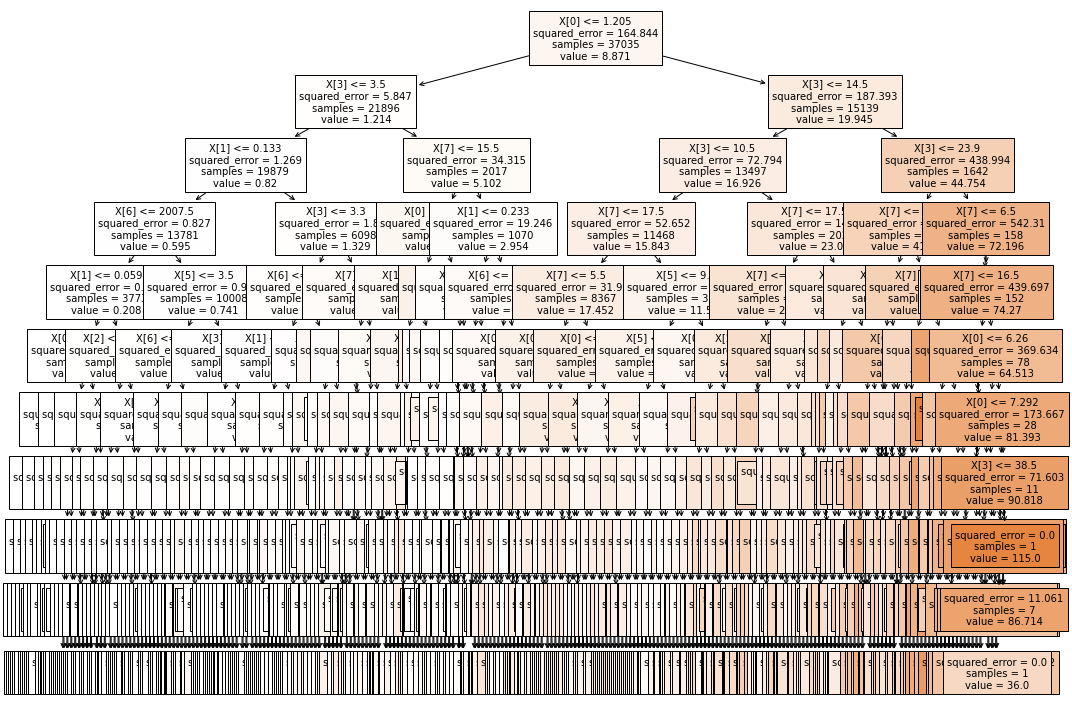

In [67]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor_best_param,filled=True, fontsize=10)
plt.tight_layout()